## Challenge - Meu primeiro modelo com Scikit-Learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
sales_data = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [3]:
# Transformar o dicionário em um DataFrame
df_sales = pd.DataFrame(sales_data)

# Adicionar uma coluna para representar os meses numericamente
df_sales['mes_numero'] = range(1, 13)

In [4]:
# Dividir os dados em conjuntos de treinamento e teste
X = df_sales[['mes_numero']]
y = df_sales['vendas']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Escolher e treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 5765.3085
R^2 Score: 0.9805


In [11]:
print(f"Intercepto: {model.intercept_:.4f}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2019.5531
Coeficiente: [109.3575419]


In [39]:
# Prever as vendas para o mês de Dezembro
month = 12
df_input = df_sales[df_sales['mes_numero'] == month]
df_input_features = df_input[['mes_numero']]
predictions = model.predict(df_input_features)
rounded_predictions = [round(pred, 2) for pred in predictions]
print(f"Previsão de vendas para Dezembro: {rounded_predictions}")

Previsão de vendas para Dezembro: [3331.84]


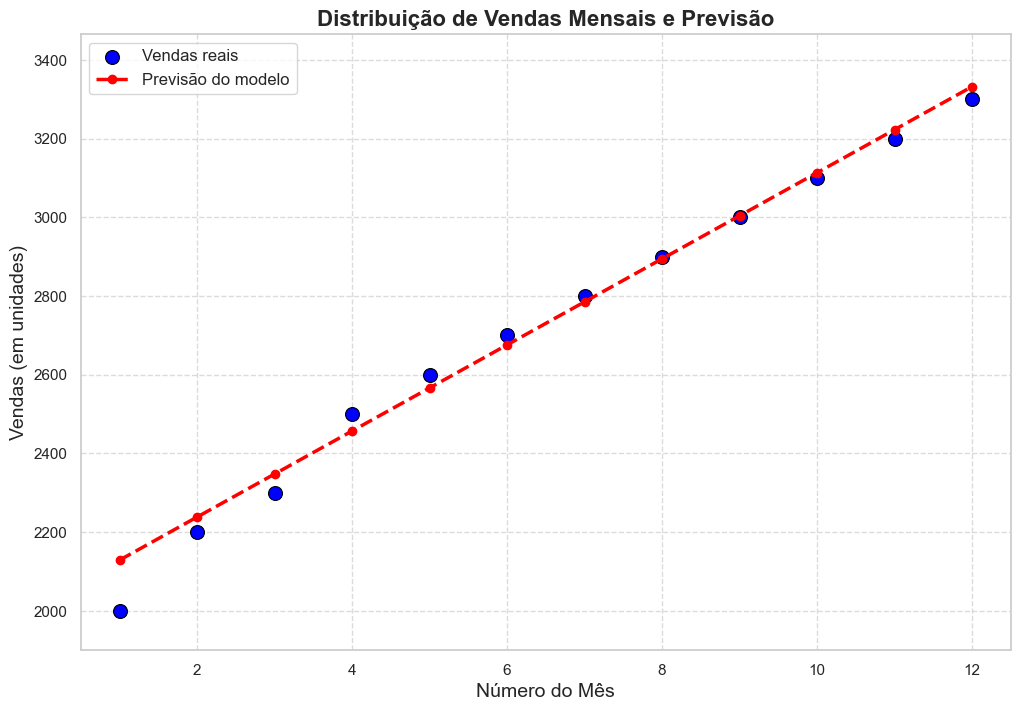

In [42]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatter plot das vendas mensais
sns.scatterplot(x='mes_numero', y='vendas', data=df_sales, s=100,
                color='blue', edgecolor='black', label='Vendas reais')

# Linha de previsão com marcadores
plt.plot(df_sales['mes_numero'], model.predict(df_sales[['mes_numero']]),
         color='red', linestyle='--', linewidth=2.5, marker='o', label='Previsão do modelo')

# Título e rótulos mais descritivos
plt.title('Distribuição de Vendas Mensais e Previsão',
          fontsize=16, weight='bold')
plt.xlabel('Número do Mês', fontsize=14)
plt.ylabel('Vendas (em unidades)', fontsize=14)

# Ajustando os limites dos eixos
plt.xlim(df_sales['mes_numero'].min() - 0.5,
         df_sales['mes_numero'].max() + 0.5)
plt.ylim(df_sales['vendas'].min() * 0.95, df_sales['vendas'].max() * 1.05)

# Legenda e grade
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrando o gráfico
plt.show()

<Figure size 800x600 with 0 Axes>

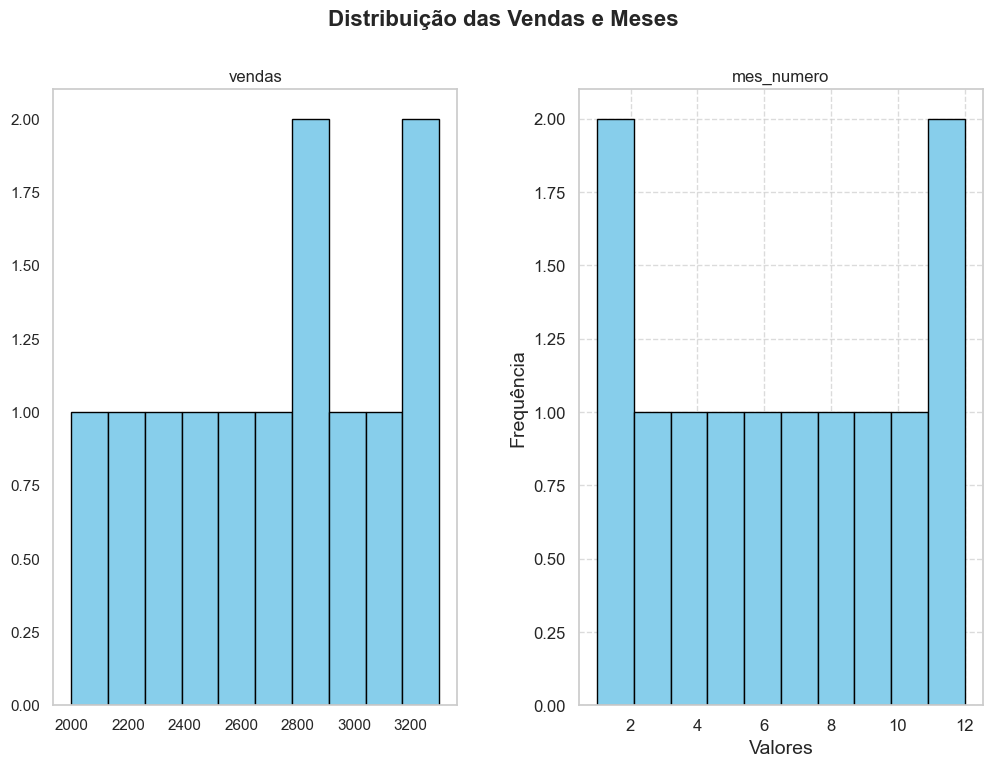

In [44]:
# Histograma de todas as variáveis

# Configurando o estilo e tamanho da figura
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Criando histogramas com bins adequados
df_sales.hist(bins=10, figsize=(12, 8), color='skyblue',
              edgecolor='black', grid=False)

# Ajustando o título principal
plt.suptitle('Distribuição das Vendas e Meses', fontsize=16, weight='bold')

# Melhorando os rótulos dos eixos para todas as subplots
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adicionando uma grid mais leve e discreta
plt.grid(True, linestyle='--', alpha=0.7)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.show()